In [1]:
# Import necessary packages
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, grid)
from gerrychain.metrics import mean_median, partisan_bias, polsby_popper, efficiency_gap, partisan_gini
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import inspect
import pickle

In [14]:
utah = pickle.load(open('graph-v3.pkl', 'rb'))

In [21]:
attribute = 'POP100'
for n in utah.nodes:
    if utah.nodes[n][attribute] != utah.nodes[n][attribute]:
        utah.nodes[n][attribute] = 0

In [22]:
pickle.dump(utah, open('graph-v4.pkl', 'wb'))

In [2]:
# Import necessary tools from gerrymandering_tools.py
from gerrymandering_tools import *

In [3]:
# Get the graph data from the file
# utah = Graph.from_json("2012_with_buffer_graph-2020-02-18.json")
utah = pickle.load(open('graph_mp_sp.pkl', 'rb'))

# Get the precincts
# precincts_orig = pickle.load(open("2018_precincts_with_pop_and_prorated_votes.pkl",'rb'))
precincts = gp.read_file("gdf_mp_sp.shp")

In [4]:
# Define our updaters
my_updaters = {"population": updaters.Tally("POP100", alias="population"),
               "d": updaters.Tally("DEM", alias="d"),
               "r": updaters.Tally("REP", alias="r"),
               "polsby_popper": polsby_popper,
               "split_counties": SplitCounties()
              }

elections = [ Election("SEN10", {"Dem": "DEM", "Rep": "REP"})]

election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

# Define our initial partition
initial_partition = GeographicPartition(utah, "US_Distric", my_updaters)

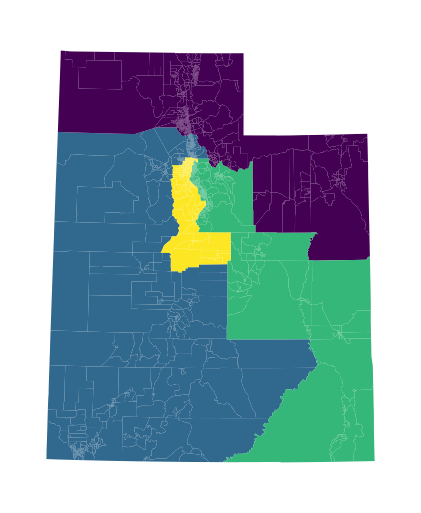

In [5]:
# Plot the current congressional district map
plot_district_map(initial_partition.assignment, precincts=precincts, save=False, savetitle="current_plan")

In [6]:
# Calculate partisan displacement (if necessary)
populations = np.array([utah.nodes[n]['POP100'] for n in utah.nodes])
pickle.dump(populations, open('populations_mp_sp.pkl', 'wb'))

partisan_environments = get_partisan_environments(precincts, 'SEN_DEM', 'SEN_REP')
pickle.dump(partisan_environments, open('partisan_environments_mp_sp_SEN.pkl', 'wb'))

partisan_environments = get_partisan_environments(precincts, 'G_DEM', 'G_REP')
pickle.dump(partisan_environments, open('partisan_environments_mp_sp_G.pkl', 'wb'))

In [9]:
sample_weights = np.array([50., 1., 500., 0., 1])
uniform = np.array([0., 0., 0., 0.])
modes = {"polsby_popper": "mattingly", "population": "mattingly", "split_counties": "mattingly", "partisan_dislocation": "avgabsolute", "cut_edges":"total"}
d, s = run_chain(utah, 5000, 1., uniform, modes=modes, storage_ratio=100,
                 populations='populations_mp_sp.pkl', partisan_environments = 'partisan_environments_mp_sp_SEN.pkl')
e = get_statistics(d)
print(percent_acceptance(e))
print(e.describe())

KeyError: 4

In [10]:
for i in utah.nodes:
    print(utah.nodes[i]['US_Distric'])

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
4
2
2
4
4
4
2
4
4
4
4
4
4
4
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
2
4
4
2
4
4
4
4
4
4
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
s1, d1 = s, d # Make copies

In [ ]:
# Plot the 9th stored assignment
plot_district_map(s[499], precincts=precincts)

In [ ]:
len(utah)

In [ ]:
# Plot the 99th stored assignment
plot_district_map(s[99], precincts=precincts2, save=False, savetitle='utahgood1')

In [ ]:
d.iloc[:, 17:]

In [ ]:
produce_box_plot(d)

In [ ]:
print(inspect.getsource(GeographicPartition))
print(inspect.getsource(polsby_popper))
print(inspect.getsource(updaters.Tally))
print(inspect.getsource(updaters.cut_edges_by_part))
print(inspect.getsource(Partition))